<a href="https://colab.research.google.com/github/NicoleSimas/Reescrita_ic/blob/main/biomassa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Gráfico 1 - Biomassa disponível para todas as mesorregiões 
# Distribuicao do Residuo disponivel
def gerar_distribuicao(biomassa):
    n_simul=10001
    BSdmin = biomassa * 0.8503
    BSdmax = biomassa * 1.3066
    sd = (BSdmax - BSdmin) / 7  # desvio padrao +- 3,5sd
    return np.random.randn(n_simul) * sd + biomassa

# Leitura dos dados
df = pd.read_csv("biomassas.csv",sep=";")

# Aplicação do Método de Monte Carlo para cada região
df["distribuicao"] = df["biomassa"].apply(gerar_distribuicao)

# Extração e aplicação dos nomes das mesorregiões do df
regiao_nomes = df["regiao"].tolist() 
subplot_titles = regiao_nomes[:8]

# Deixar espaço em 3x1
subplot_titles.append("")
subplot_titles.append(regiao_nomes[8])
subplot_titles.append(regiao_nomes[9])
subplot_titles.append("")

# Colocando título nos subplots 
fig = make_subplots(
    rows=3,
    cols=4,
    subplot_titles=subplot_titles
)

positions = list(range(1, 9)) + [10, 11]

# Loop para adicionar cada histograma na sua posição correspondente
for pos, (_, regiao_data) in zip(positions, df.iterrows()):
    # Converte a posição linear (1-12) para coordenadas de linha e coluna (1-based)
    row = (pos - 1) // 4 + 1
    col = (pos - 1) % 4 + 1

    # Gera os dados do histograma
    counts, bins = np.histogram(regiao_data["distribuicao"], bins=30)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    bin_width = bins[1] - bins[0]

    fig.add_trace(
        go.Bar(
            x=bin_centers,
            y=counts,
            marker_color="brown",
            width=bin_width * 0.9, 
            showlegend=False,
            name=regiao_data['regiao'] 
        ),
        row=row,
        col=col
    )

fig.update_layout(
    height=900,
    width=1500, 
    title_text="<b>Distribuição da Biomassa Disponível [ton/ano] por Mesorregião do Paraná</b>",
    title_x=0.5,
    bargap=0.05,
    showlegend=False
)

fig.update_xaxes(tickformat=".0f")
for annotation in fig.layout.annotations:
    annotation.font.size = 12

fig.show()

# Gráfico 2 - Densidade de Potencial de Hidrogênio
# Fator de conversão % gH2/kgBS
FaCH2 = 90

# Cálculo da produção de hidrogênio
df['dist_prod_h2'] = df["biomassa"].apply(gerar_distribuicao).apply(lambda bsd: bsd * FaCH2 / 1000)

# Cálculo da densidade de hidrogênio solar 
df['dist_densidade_h2'] = df['dist_prod_h2'] / df['area']

fig = go.Figure()

# Itera sobre cada linha do DataFrame para adicionar um boxplot por mesorregião
for index, row in df.iterrows():
    fig.add_trace(go.Box(
        y=row['dist_densidade_h2'], 
        name=row['sigla'],          
        boxpoints='outliers',    
        marker_color='green',
        line_color='black'
    ))

fig.update_layout(
    title_text='<b>Densidade de Potencial de Hidrogênio - Biomassa</b>',
    title_x=0.5,
    xaxis_title='Mesorregiões',
    yaxis_title='Hidrogênio (ton/km²/ano)',
    template='plotly_white',
    showlegend=False 
)

fig.show()

# Gráfico 3 - Fator de Conversão
n_simul = 10001
FaCH2_mu = 90
FaCH2_min = 30
FaCH2_max = 150
amplitude = FaCH2_max - FaCH2_min
sd_FaCH2 = amplitude / 7
FaCH2 = np.random.randn(n_simul) * sd_FaCH2 + FaCH2_mu

counts, bins = np.histogram(FaCH2, bins=30)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_width = bins[1] - bins[0]

fig_fc = go.Figure()
fig_fc.add_trace(go.Bar(
    x=bin_centers,
    y=counts,
    marker_color='purple',
    width=bin_width * 0.9
))

fig_fc.update_layout(
    title_text='<b>Fator de Conversão - Gaseificador DFB</b>',
    xaxis_title='Fator de Conversão [gH₂/kgBS]',
    yaxis_title='Densidade',
    template='plotly_white'
)

fig_fc.show()

In [4]:
# Gráfico - Densidade de Potencial de Hidrogênio sem COr

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Distribuicao do Residuo disponivel
def gerar_distribuicao(biomassa):
    n_simul=10001
    BSdmin = biomassa * 0.8503
    BSdmax = biomassa * 1.3066
    sd = (BSdmax - BSdmin) / 7  # desvio padrao +- 3,5sd
    return np.random.randn(n_simul) * sd + biomassa

# Leitura dos dados
df = pd.read_csv("biomassas.csv",sep=";")

# Aplicação do Método de Monte Carlo para cada região
df["distribuicao"] = df["biomassa"].apply(gerar_distribuicao)

# Extração e aplicação dos nomes das mesorregiões do df
regiao_nomes = df["regiao"].tolist() 
subplot_titles = regiao_nomes[:8]

# Deixar espaço em 3x1
subplot_titles.append("")
subplot_titles.append(regiao_nomes[8])
subplot_titles.append(regiao_nomes[9])
subplot_titles.append("")

# Colocando título nos subplots 
fig = make_subplots(
    rows=3,
    cols=4,
    subplot_titles=subplot_titles
)

positions = list(range(1, 9)) + [10, 11]

# Loop para adicionar cada histograma na sua posição correspondente
for pos, (_, regiao_data) in zip(positions, df.iterrows()):
    # Converte a posição linear (1-12) para coordenadas de linha e coluna (1-based)
    row = (pos - 1) // 4 + 1
    col = (pos - 1) % 4 + 1

    # Gera os dados do histograma
    counts, bins = np.histogram(regiao_data["distribuicao"], bins=30)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    bin_width = bins[1] - bins[0]

    fig.add_trace(
        go.Bar(
            x=bin_centers,
            y=counts,
            marker_color="brown",
            width=bin_width * 0.9, 
            showlegend=False,
            name=regiao_data['regiao'] 
        ),
        row=row,
        col=col
    )

fig.update_layout(
    height=900,
    width=1400, 
    title_text="<b>Distribuição da Biomassa Disponível [ton/ano] por Mesorregião do Paraná</b>",
    title_x=0.5,
    bargap=0.05,
    showlegend=False
)

fig.update_xaxes(tickformat=".0f")
for annotation in fig.layout.annotations:
    annotation.font.size = 12

# Fator de conversão % gH2/kgBS
FaCH2 = 90

# Cálculo da produção de hidrogênio
df['dist_prod_h2'] = df["biomassa"].apply(gerar_distribuicao).apply(lambda bsd: bsd * FaCH2 / 1000)

# Cálculo da densidade de hidrogênio solar 
df['dist_densidade_h2'] = df['dist_prod_h2'] / df['area']

# Gráfico Boxplot sem a Mesorregião COr ------------------

df_sem_cor = df[df['sigla'] != 'COr'].copy()

fig = go.Figure()

# 3. Itera sobre o DataFrame filtrado para adicionar um boxplot por mesorregião
for index, row in df_sem_cor.iterrows():
    fig.add_trace(go.Box(
        y=row['dist_densidade_h2'],  
        name=row['sigla'],           
        boxpoints='outliers',       
        marker_color='green',
        line_color='black'
    ))

fig.update_layout(
    title_text='<b>Densidade de Potencial de Hidrogênio - Biomassa (sem COr)</b>',
    title_x=0.5,
    xaxis_title='Mesorregiões',
    yaxis_title='Hidrogênio (ton/km²/ano)',
    template='plotly_white',
    showlegend=False 
)

fig.show()

In [ ]:
# Gráfico comparativo e interativo da Biomassa disponível em cada mesorregião

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Distribuicao do Residuo disponivel
def gerar_biomassa(BSd):
    n_simul = 10001
    BSdmin = BSd * 0.8503
    BSdmax = BSd * 1.3066
    amplitude = BSdmax - BSdmin
    sd = amplitude / 7  # desvio padrão ± 3,5sd
    return np.random.randn(n_simul) * sd + BSd

# Leitura dos dados
df = pd.read_csv("biomassas.csv", sep=";")

# Aplicação do Método de Monte Carlo para cada região
df["distribuicao"] = df["biomassa"].apply(gerar_biomassa)

# Paleta de cores
cores = px.colors.qualitative.Vivid

fig = go.Figure()

for i, row_data in df.iterrows():
    fig.add_trace(go.Histogram(
        x=row_data["distribuicao"],
        nbinsx=30,
        name=row_data["regiao"],
        opacity=0.6,
        marker_color=cores[i % len(cores)]
    ))

fig.update_layout(
    title="<b>Distribuição da Biomassa Disponível por Mesorregião</b>",
    title_x=0.5,
    xaxis_title="Biomassa Disponível [ton/ano]",
    yaxis_title="Densidade",
    barmode='overlay',
    bargap=0.05,
    height=650,
    width=1100,
    template="plotly_white",
    legend=dict(
        title="<b>Regiões</b>",
        orientation="h",
        yanchor="top",
        y=-0.2,         # legenda abaixo do gráfico
        xanchor="center",
        x=0.5
    )
)

fig.update_xaxes(tickangle=0, tickformat=".0f", showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()


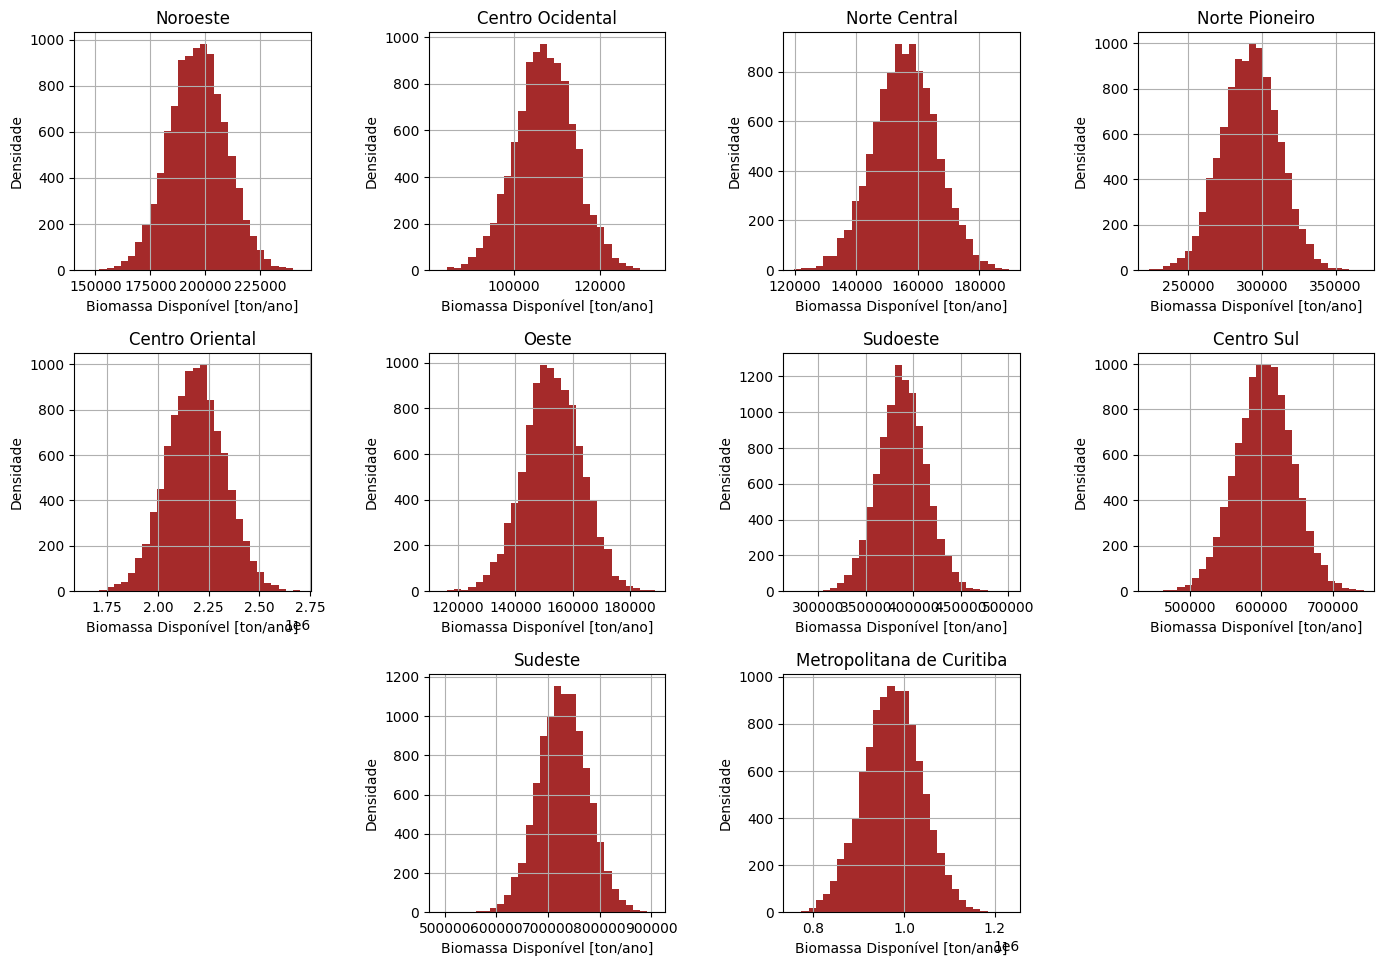

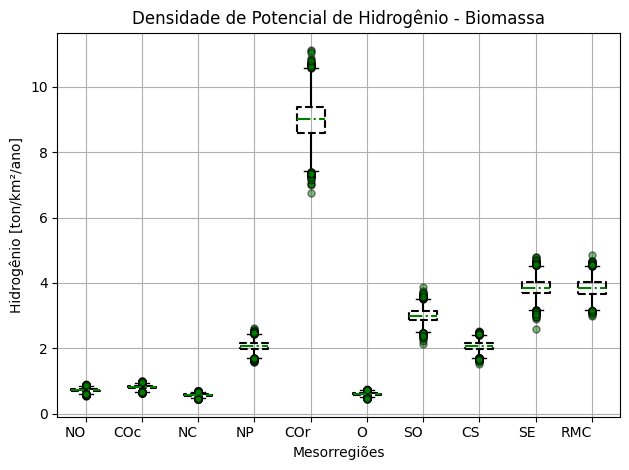

In [ ]:
# Código e gráficos sem Plotly 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Funções

def gerar_biomassa(biomassa_base):
    n_simul = 10001
    BSdmin = biomassa_base * 0.8503
    BSdmax = biomassa_base * 1.3066
    amplitude = BSdmax - BSdmin
    sd = amplitude / 7  # desvio padrão +- 3,5sd
    return np.random.randn(n_simul) * sd + biomassa_base

def calcular_hidrogenio(BSd):
    FaCH2 = 90  # gH2/kgBS
    ProdH2 = BSd * FaCH2 / 1000  # ton H2/ano
    return ProdH2

def calcular_densidade(ProdH2, area):
    DensH2 = ProdH2 / area  # ton H2/km²/ano
    return DensH2

def plotar_histogramas(distribuicoes, regioes):
    plt.figure(figsize=(20, 11))
    for i, regiao in enumerate(regioes, start=1):
        posicao = i if i < 9 else i + 1  # pula o subplot 9 (para ajustar layout)
        plt.subplot(3, 4, posicao)
        plt.hist(distribuicoes[regiao], color='brown', bins=30)
        plt.title(regiao)
        plt.xlabel('Biomassa Disponível [ton/ano]')
        plt.ylabel('Densidade')
        plt.grid()
    plt.subplots_adjust(left=0.25, bottom=0.1, right=0.9, top=0.9, wspace=0.50, hspace=0.35)
    plt.show()

# Leitura dos dados
df = pd.read_csv("biomassas.csv", sep=";")  # deve conter colunas: regiao, biomassa, area

# Aplicação do Método de Monte Carlo para cada região
df["distribuicao"] = df["biomassa"].apply(gerar_biomassa)
distribuicoes = dict(zip(df["regiao"], df["distribuicao"]))
regioes = df["regiao"].tolist()

# Cálculo de Produção de Hidrogênio e Densidade de Hidrogênio Solar 
densidades = []

for i, row in df.iterrows():
    regiao = row["regiao"]
    area = row["area"]
    BSd = distribuicoes[regiao]
    ProdH2 = calcular_hidrogenio(BSd)
    DensH2 = calcular_densidade(ProdH2, area)
    densidades.append(DensH2)

# Histogramas
plotar_histogramas(distribuicoes, regioes)

# Boxplot
fig, ax = plt.subplots()
boxprops = dict(linestyle='--', linewidth=1.5, color='black')
flierprops = dict(marker='o', markerfacecolor='green', markersize=5, alpha=0.5)
medianprops = dict(linestyle='-.', linewidth=1.5, color='green')
whiskerprops = dict(linestyle='-', linewidth=1.5, color='black')

ax.boxplot(densidades, boxprops=boxprops, flierprops=flierprops,
           medianprops=medianprops, whiskerprops=whiskerprops)

ax.set_title('Densidade de Potencial de Hidrogênio - Biomassa')
ax.set_xlabel('Mesorregiões')
ax.set_ylabel('Hidrogênio [ton/km²/ano]')
ax.set_xticklabels(df["sigla"].tolist(), rotation=0, ha='right')
plt.grid()
plt.tight_layout()
plt.show()
